In [1]:
import itertools
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

from root_pandas import read_root, to_root

import matplotlib.pyplot as plt

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def get_cm_mutlti(df, method='BDT'):
    """
    Retrieve a confusion matrix given a dataframe as an input
    """
    pred_labels = df[['{}_Signals'.format(method), '{}_CBackground'.format(method), '{}_KBackground'.format(method)]].idxmax(axis = 1)
    pred_flags = pred_labels.map({'{}_Signals'.format(method):0, '{}_CBackground'.format(method):1, '{}_KBackground'.format(method):2}).values
    
    cm = confusion_matrix(df['classID'].values,pred_flags)
    
    return cm

In [5]:
def plot_hists_2parms(dataframe, parameter0 = 'ElTime', parameter1 = 'ElP',  classifier = 'BDT'):
    """Plot histograms to check classifier performance
    
    Keyword arguments:
    dataframe -- pandas dataframe containing a ROOT tree
    parameter -- parameter to check (default = 'ElP)
    classifier -- classifier used (default = 'BDT')
    """
    # get values of parameter
    x0 = np.array((df[[parameter0]][df[classifier]>0]).values.tolist())
    y0 = np.array((df[[parameter1]][df[classifier]>0]).values.tolist())
    # get outputs of classifier
    x1 = np.array((df[[parameter0]][df[classifier]<0]).values.tolist())
    y1 = np.array((df[[parameter1]][df[classifier]<0]).values.tolist())
    
    fig, axs = plt.subplots(1,2, sharey = True)
    axs[0].hist2d(x0.reshape(-1), y0.reshape(-1), bins = 50, cmap = plt.cm.jet)
    axs[0].set_xlabel(parameter0)
    axs[0].set_title('BDT > 0')
    axs[1].hist2d(x1.reshape(-1), y1.reshape(-1), bins = 50, cmap = plt.cm.jet)
    axs[1].set_xlabel(parameter0)
    axs[0].set_ylabel(parameter1)
    axs[1].set_title('BDT < 0')
    fig.savefig('hist{}{}.png'.format(parameter0, parameter1, topology))
    
    plt.show()
    
    return fig, axs

In [2]:
data = read_root('../data/tmva3/Data_clean.root')

In [3]:
# read root file
df = read_root('MultiBackground.root', 'dataset/TrainTree')

IOError: tree 'dataset/TrainTree' not found in MultiBackground.root

In [ ]:
df

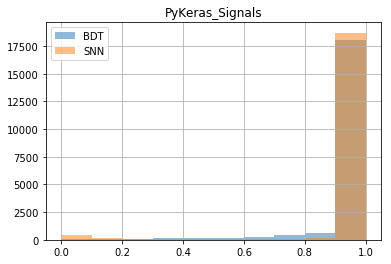

In [89]:
fig, axs = plt.subplots(1,1)
df[df['classID']==0].hist('BDT_Signals', ax=axs, alpha = 0.5, label = 'BDT')
df[df['classID']==0].hist('PyKeras_Signals', ax=axs, alpha = 0.5, label = 'SNN')
plt.legend()

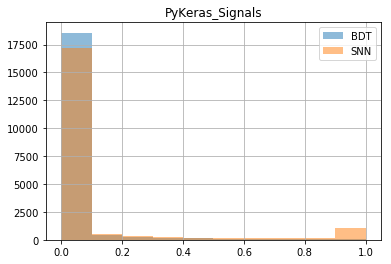

In [90]:
fig, axs = plt.subplots(1,1)
df[df['classID']==1].hist('BDT_Signals', ax=axs, alpha = 0.5, label = 'BDT')
df[df['classID']==1].hist('PyKeras_Signals', ax=axs, alpha = 0.5, label = 'SNN')
plt.legend()

In [ ]:
fig, axs = plt.subplots(1,1)
df[df['classID']==0].plot('BDT_Signals', 'BDT_CBackground', ax=axs, alpha = 0.5, label = 'BDT')
#df[df['classID']==0].hist('PyKeras_Signals', ax=axs, alpha = 0.5, label = 'SNN')
plt.legend()

In [26]:
# get predicted flags
pred_labels = df[['BDT_Signals', 'BDT_CBackground', 'BDT_KBackground']].idxmax(axis = 1)
pred_flags = pred_labels.map({'BDT_Signals':0, 'BDT_CBackground':1, 'BDT_KBackground':2}).values

In [27]:
# get confusion matrix
cm = confusion_matrix(df['classID'].values,pred_flags)

Confusion matrix, without normalization
[[19508   322   170]
 [  483 17033  2484]
 [  163  2523 17314]]


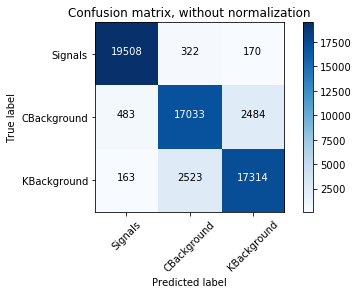

In [28]:
plt.figure()
plot_confusion_matrix(cm, classes=['Signals','CBackground', 'KBackground'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.9754  0.0161  0.0085 ]
 [0.02415 0.85165 0.1242 ]
 [0.00815 0.12615 0.8657 ]]


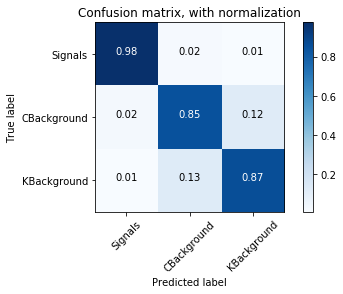

In [30]:
plt.figure()
plot_confusion_matrix(cm, classes=['Signals', 'CBackground', 'KBackground'], normalize = True,
                      title='Confusion matrix, with normalization')

In [50]:
df_app = read_root('resultsMB.root')

In [83]:
df_s = read_root('resultsSingleBackground.root')

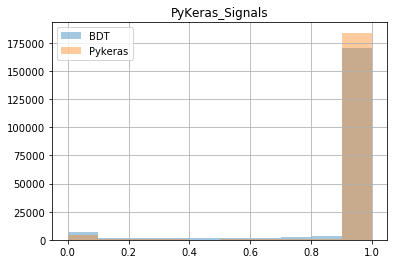

In [59]:
fig, axs = plt.subplots(1,1)
df_app[df_app['classID']==0].hist('BDT_Signals', alpha = 0.4, label = 'BDT', ax=axs)
df_app[df_app['classID']==0].hist('PyKeras_Signals', alpha = 0.4, label = 'Pykeras', ax=axs)
plt.legend()

In [62]:
# get predicted flags
pred_labels_BDT = df_app[['BDT_Signals', 'BDT_CBackground', 'BDT_KBackground']].idxmax(axis = 1)
pred_flags_BDT = pred_labels_BDT.map({'BDT_Signals':0, 'BDT_CBackground':1, 'BDT_KBackground':2}).values

In [63]:
pred_labels_PyKeras = df_app[['PyKeras_Signals', 'PyKeras_CBackground', 'PyKeras_KBackground']].idxmax(axis = 1)
pred_flags_PyKeras = pred_labels_PyKeras.map({'PyKeras_Signals':0, 'PyKeras_CBackground':1, 'PyKeras_KBackground':2}).values

In [64]:
# get confusion matrix
cm_BDT = confusion_matrix(df_app['classID'].values,pred_flags_BDT)
cm_PyKeras = confusion_matrix(df_app['classID'].values,pred_flags_PyKeras)

Normalized confusion matrix
[[0.93534078 0.01797307 0.04668615]
 [0.21432108 0.49459738 0.29108154]
 [0.332088   0.4167485  0.2511635 ]]


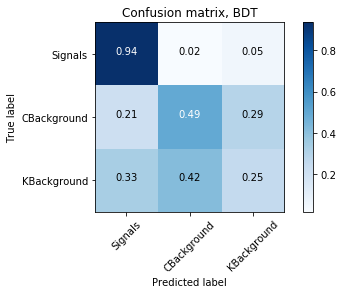

In [68]:
plt.figure()
plot_confusion_matrix(cm_BDT, classes=['Signals', 'CBackground', 'KBackground'], normalize = True,
                      title='Confusion matrix, BDT')
plt.savefig('cm.png', dpi=150)

Normalized confusion matrix
[[0.9691003  0.00500992 0.02588978]
 [0.26487734 0.46140226 0.2737204 ]
 [0.37990078 0.38685794 0.23324128]]


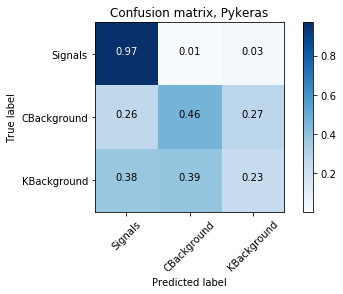

In [69]:
plt.figure()
plot_confusion_matrix(cm_PyKeras, classes=['Signals', 'CBackground', 'KBackground'], normalize = True,
                      title='Confusion matrix, Pykeras')

In [9]:
dfs = read_root('CombBackground.root', 'datasetComb/TestTree')

In [12]:
dfs

,classID,className,NDet,NPerm,Detector,ElTime,ElEdep,ElDeltaE,ElPreE,ElP,...,PimPreE,PimP,PimTh,PimPhi,PimVz,PimTrChi2,PimDet,weight,BDT,PyKeras
0,0,Signal,6.0,2.0,0.0,0.022802,0.000000,3.669191,0.000000,8.474183,...,0.000000,1.301064,23.833439,2.991771,0.000000,0.000000,1.0,1.0,0.043942,9.999975e-01
1,0,Signal,6.0,2.0,0.0,0.039999,0.000000,4.466167,0.000000,5.602344,...,0.000000,2.958131,8.493059,-3.045535,-1.204222,0.000000,1.0,1.0,0.146198,1.000000e+00
2,1,Background,5.0,1.0,0.0,-0.120219,0.000000,5.398191,0.000000,6.982383,...,0.000000,2.042200,5.789608,-1.439729,177.188080,0.000000,2.0,1.0,-0.241333,1.028674e-31
3,0,Signal,8.0,4.0,0.0,0.115514,0.000000,4.040821,0.000000,8.240899,...,0.000000,0.912579,43.067726,0.886551,-0.145192,0.362716,1.0,1.0,0.117621,1.000000e+00
4,0,Signal,16.0,2.0,0.0,0.073186,0.000000,4.719693,0.000000,6.423478,...,0.000000,1.853645,19.388359,-2.130932,0.000000,0.000000,1.0,1.0,0.057934,9.999996e-01
5,1,Background,5.0,12.0,0.0,0.190588,0.000000,2.094061,0.000000,7.129727,...,0.034556,0.837655,35.301720,0.319946,-6.343539,300.597931,10.0,1.0,-0.212407,0.000000e+00
6,1,Background,8.0,4.0,0.0,-0.000987,0.000000,3.613554,0.000000,6.572195,...,0.036271,2.391943,17.322828,-1.038309,1.059823,3.916324,1.0,1.0,-0.068372,7.611268e-13
7,1,Background,9.0,2.0,0.0,-0.081461,0.000000,3.674420,0.000000,6.884840,...,0.000000,0.645980,16.146492,0.474471,0.000000,0.000000,1.0,1.0,-0.110169,5.413666e-08
8,1,Background,13.0,1.0,1.0,16.960409,0.108390,10.637794,0.033101,1.533352,...,0.000000,6.286146,2.316917,1.915225,0.000000,0.000000,1.0,1.0,-0.184538,0.000000e+00
9,0,Signal,6.0,2.0,0.0,0.018255,0.000000,3.544388,0.000000,6.223547,...,0.000000,1.098162,15.784194,1.442649,-5.518752,0.000000,1.0,1.0,0.179133,1.000000e+00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2374ca6d0>],
      dtype=object)

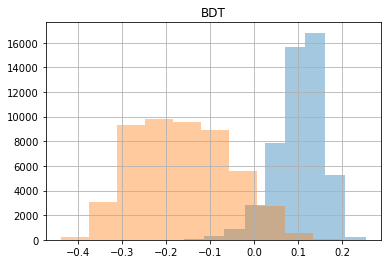

In [16]:
fig, axs = plt.subplots(1,1)
dfs[dfs['classID']==0].hist('BDT', alpha = 0.4, label = 'signal', ax=axs)
dfs[dfs['classID']==1].hist('BDT', alpha = 0.4, label = 'background', ax=axs)

In [39]:
dfs_cut = dfs[dfs['BDT']>=-0.1].drop(['weight', 'className'], axis =1)

In [40]:
dfs_cut

,classID,NDet,NPerm,Detector,ElTime,ElEdep,ElDeltaE,ElPreE,ElP,ElTh,...,PimDeltaE,PimPreE,PimP,PimTh,PimPhi,PimVz,PimTrChi2,PimDet,BDT,PyKeras
0,0,6.0,2.0,0.0,0.022802,0.0,3.669191,0.0,8.474183,0.079486,...,0.000000,0.000000,1.301064,23.833439,2.991771,0.000000,0.000000,1.0,0.043942,9.999975e-01
1,0,6.0,2.0,0.0,0.039999,0.0,4.466167,0.0,5.602344,0.047308,...,0.000000,0.000000,2.958131,8.493059,-3.045535,-1.204222,0.000000,1.0,0.146198,1.000000e+00
3,0,8.0,4.0,0.0,0.115514,0.0,4.040821,0.0,8.240899,0.058517,...,78.554794,0.000000,0.912579,43.067726,0.886551,-0.145192,0.362716,1.0,0.117621,1.000000e+00
4,0,16.0,2.0,0.0,0.073186,0.0,4.719693,0.0,6.423478,0.055292,...,0.000000,0.000000,1.853645,19.388359,-2.130932,0.000000,0.000000,1.0,0.057934,9.999996e-01
6,1,8.0,4.0,0.0,-0.000987,0.0,3.613554,0.0,6.572195,0.072647,...,10.290070,0.036271,2.391943,17.322828,-1.038309,1.059823,3.916324,1.0,-0.068372,7.611268e-13
9,0,6.0,2.0,0.0,0.018255,0.0,3.544388,0.0,6.223547,0.048931,...,0.000000,0.000000,1.098162,15.784194,1.442649,-5.518752,0.000000,1.0,0.179133,1.000000e+00
10,0,7.0,2.0,0.0,-0.130366,0.0,4.608206,0.0,5.344362,0.056986,...,0.000000,0.000000,0.715010,16.103701,-3.139019,0.000000,0.000000,1.0,0.163983,1.000000e+00
12,0,4.0,4.0,0.0,-0.068858,0.0,3.816248,0.0,7.120983,0.049548,...,13.884646,0.000000,0.559243,28.814625,2.782863,54.762123,82908.296875,1.0,0.087585,1.000000e+00
14,1,13.0,4.0,0.0,-0.227519,0.0,3.847991,0.0,6.323788,0.044150,...,10.080900,0.031766,2.592341,16.682617,-2.159943,1.238539,1.469908,1.0,-0.093024,4.071200e-16
16,0,13.0,2.0,0.0,0.165060,0.0,4.210385,0.0,6.051505,0.055849,...,0.000000,0.000000,2.894255,3.313003,-1.773443,-0.155147,0.000000,1.0,0.085005,5.745356e-01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1da5fa8d0>],
      dtype=object)

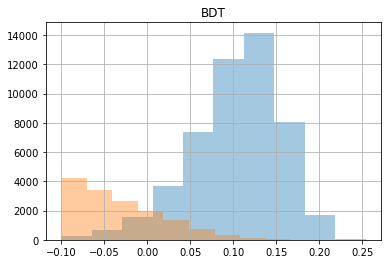

In [41]:
fig, axs = plt.subplots(1,1)
dfs_cut[dfs_cut['classID']==0].hist('BDT', alpha = 0.4, label = 'signal', ax=axs)
dfs_cut[dfs_cut['classID']==1].hist('BDT', alpha = 0.4, label = 'background', ax=axs)

In [42]:
dfr = read_root('CombBackgroundCut.root', 'datasetCombCut/TestTree')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1da534f10>],
      dtype=object)

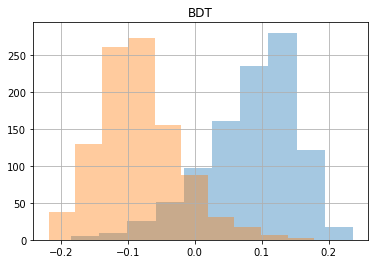

In [44]:
fig, axs = plt.subplots(1,1)
dfr[dfr['classID']==0].hist('BDT', alpha = 0.4, label = 'signal', ax=axs)
dfr[dfr['classID']==1].hist('BDT', alpha = 0.4, label = 'background', ax=axs)

In [32]:
dfs_cut.to_root('Data_cut.root', key='HSParticles')

In [45]:
df_cut = read_root('resultsSingleBackgroundCut100K.root')

In [70]:
df_100 = read_root('resultsSingleBackground100K.root')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1da496710>],
      dtype=object)

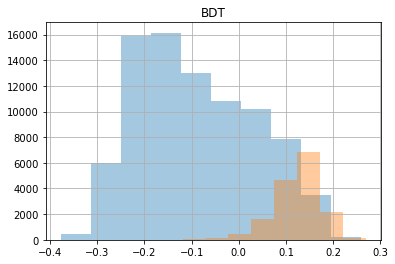

In [47]:
fig, axs = plt.subplots(1,1)
df_cut[df_cut['classID']==0].hist('BDT', alpha = 0.4, label = 'signal', ax=axs)
df_cut[df_cut['classID']==1].hist('BDT', alpha = 0.4, label = 'background', ax=axs)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1d9b113d0>],
      dtype=object)

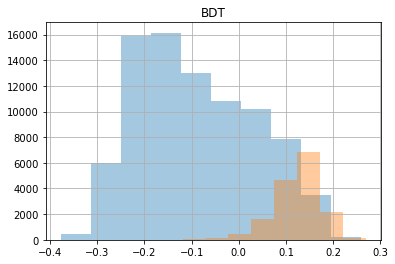

In [71]:
fig, axs = plt.subplots(1,1)
df_100[df_100['classID']==0].hist('BDT', alpha = 0.4, label = 'signal', ax=axs)
df_100[df_100['classID']==1].hist('BDT', alpha = 0.4, label = 'background', ax=axs)

import seaborn as sns

df_2_plot = df_app.drop('classID', axis = 1)

g = sns.PairGrid(df_2_plot.loc[:, df_2_plot.columns.difference(['classID'])])
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);